In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Read in the data

df = pd.read_csv(r'D:\Data Analyst Portfolio Project\movies.csv.zip')

In [2]:
#Let's Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# changing data type of specific columns (received NaN values, used fillna function)

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [13]:
#creating correct year column

def extract_year(date_str):
    try:
        return int(parser.parse(str(date_str), fuzzy=True).year)
    except (parser.ParserError, TypeError, ValueError, AttributeError):
        return None

In [15]:
df['year_correct'] = df['released'].apply(extract_year)

In [17]:
df['year_correct'] = df['year_correct'].astype('Int64')

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [21]:
#gross figures are not coming out as whole numbers

def convert_to_integer(scientific_notation):
    try:
        return int(float(scientific_notation))
    except (ValueError, TypeError):
        return None

In [23]:
df['gross'] = df['gross'].apply(convert_to_integer)
df['gross'] = df['gross'].astype('Int64')

<Axes: >

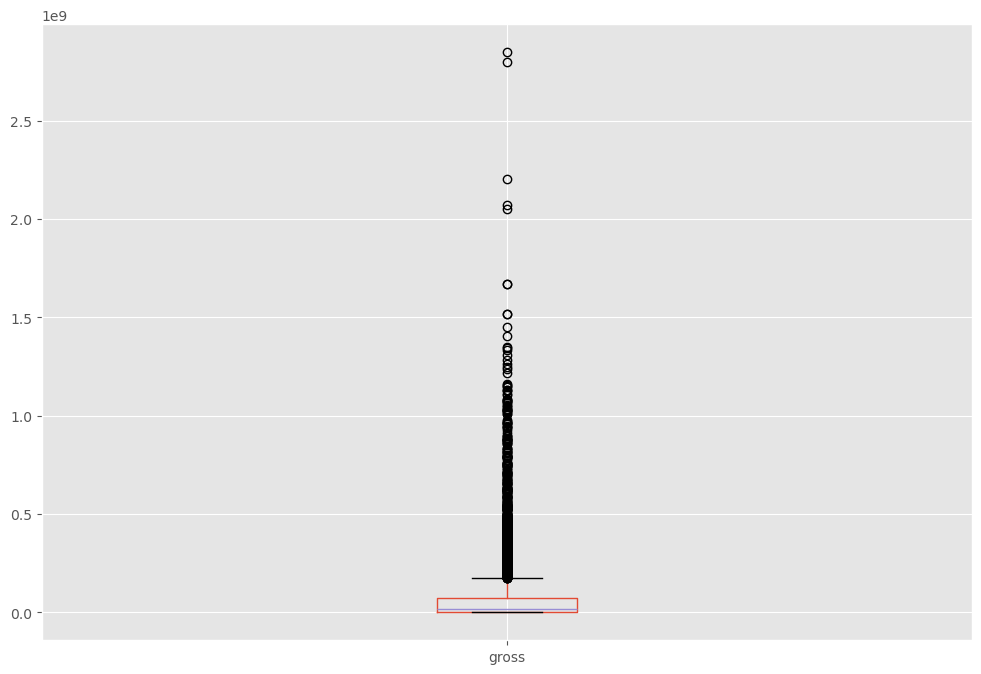

In [25]:
# Are there any outliers?

df.boxplot(column=['gross'])

In [27]:
df = df.drop_duplicates()

In [254]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

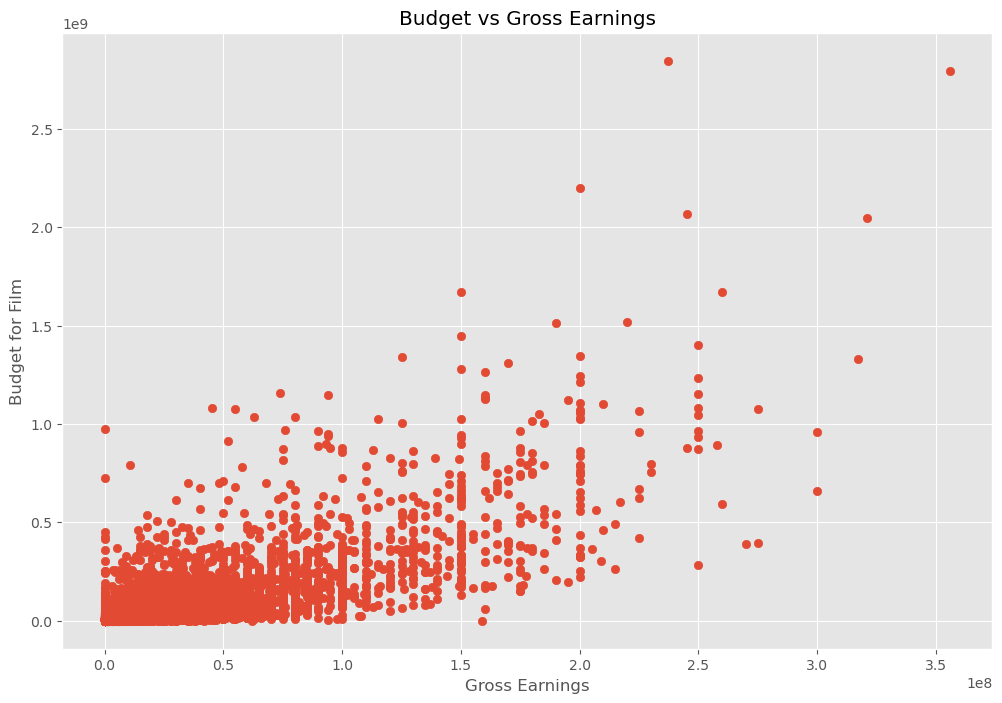

In [256]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [258]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [260]:
# When i try to plot with "regplot" I am receiving an error that suggest there are non-numeric values in my "Budget and Gross" columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# I'm creating a separate dataset to run the plot below without error

df_cleaned = df.dropna(subset=['budget', 'gross'])

df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')

<Axes: xlabel='budget', ylabel='gross'>

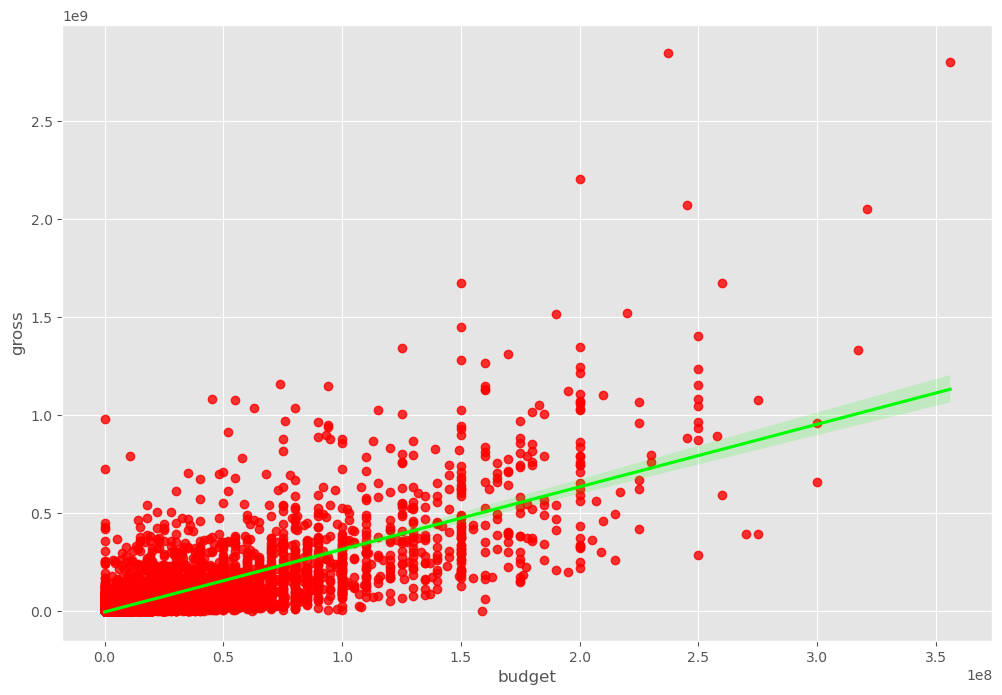

In [262]:

sns.regplot(x='budget', y='gross', data=df_cleaned, scatter_kws={"color": "red"}, line_kws={"color":"lime"})

In [264]:
numeric_df = df_cleaned.select_dtypes(include=[np.number])

numeric_df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.218429
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.300066
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.255026
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
year_correct,0.997415,0.105994,0.218429,0.300066,0.255026,0.120636,1.000000


In [266]:
correlation_matrix = numeric_df.corr(method='pearson')

In [268]:
numeric_df.dtypes

year              int64
score           float64
votes           float64
budget            int64
gross             int64
runtime         float64
year_correct      Int64
dtype: object

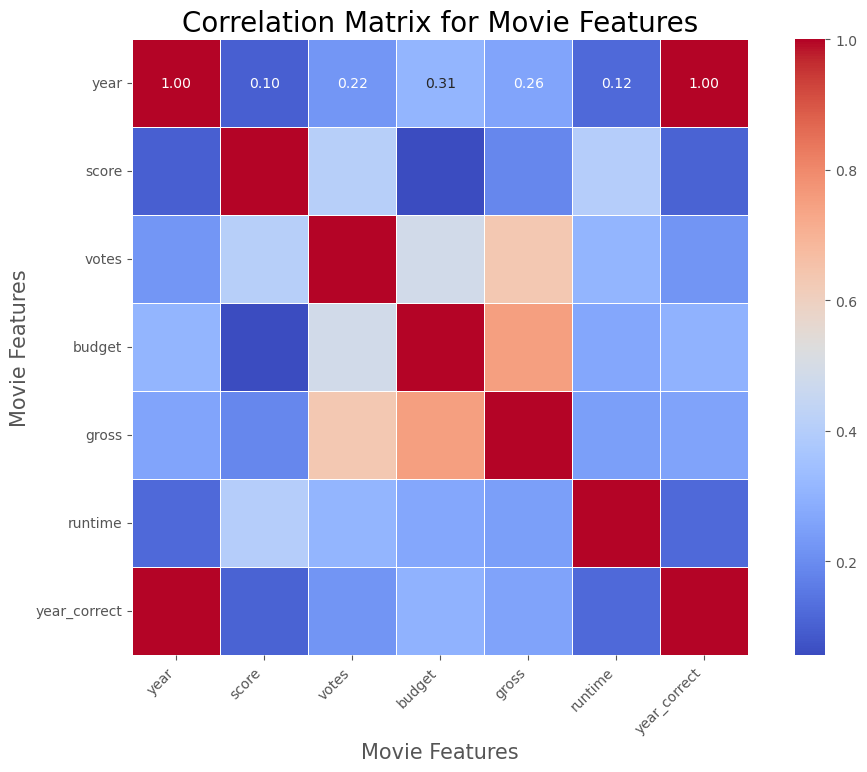

In [270]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Matrix for Movie Features', size=20)
plt.xlabel('Movie Features', size=15)
plt.ylabel('Movie Features', size=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [274]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,0.303939,0.138367,0.253906,0.654708,0.107033,0.595709,0.720119,0.782765,0.652683,0.190638,0.111217,0.978147,0.682797,0.071772,0.246706
rating,0.303939,1.000000,-0.012156,0.037943,0.237091,-0.065634,0.118612,0.235155,0.256080,0.243749,0.158906,0.087313,0.310789,0.278813,0.033214,0.026917
genre,0.138367,-0.012156,1.000000,0.087977,0.091335,0.063222,0.148546,0.093457,0.088163,0.098061,-0.073897,0.101274,0.134001,0.059056,0.005585,0.084575
year,0.253906,0.037943,0.087977,1.000000,0.316020,0.076737,0.326475,0.173235,0.212293,0.227655,-0.053654,0.060244,0.266957,0.121289,0.032916,0.940309
released,0.654708,0.237091,0.091335,0.316020,1.000000,0.069218,0.450235,0.502899,0.547861,0.476127,0.162192,0.081224,0.668367,0.465426,0.048272,0.319839
score,0.107033,-0.065634,0.063222,0.076737,0.069218,1.000000,0.233438,0.149666,0.103866,0.106351,-0.098455,0.001150,0.113338,0.036171,0.035609,0.084386
votes,0.595709,0.118612,0.148546,0.326475,0.450235,0.233438,1.000000,0.495005,0.521115,0.451158,0.050876,0.038523,0.611780,0.390203,0.067696,0.320999
director,0.720119,0.235155,0.093457,0.173235,0.502899,0.149666,0.495005,1.000000,0.696031,0.580146,0.197110,0.043335,0.737284,0.614151,0.080150,0.169672
writer,0.782765,0.256080,0.088163,0.212293,0.547861,0.103866,0.521115,0.696031,1.000000,0.589832,0.201882,0.064136,0.797703,0.616007,0.057754,0.206574
star,0.652683,0.243749,0.098061,0.227655,0.476127,0.106351,0.451158,0.580146,0.589832,1.000000,0.221251,0.064888,0.669416,0.569721,0.072543,0.225503


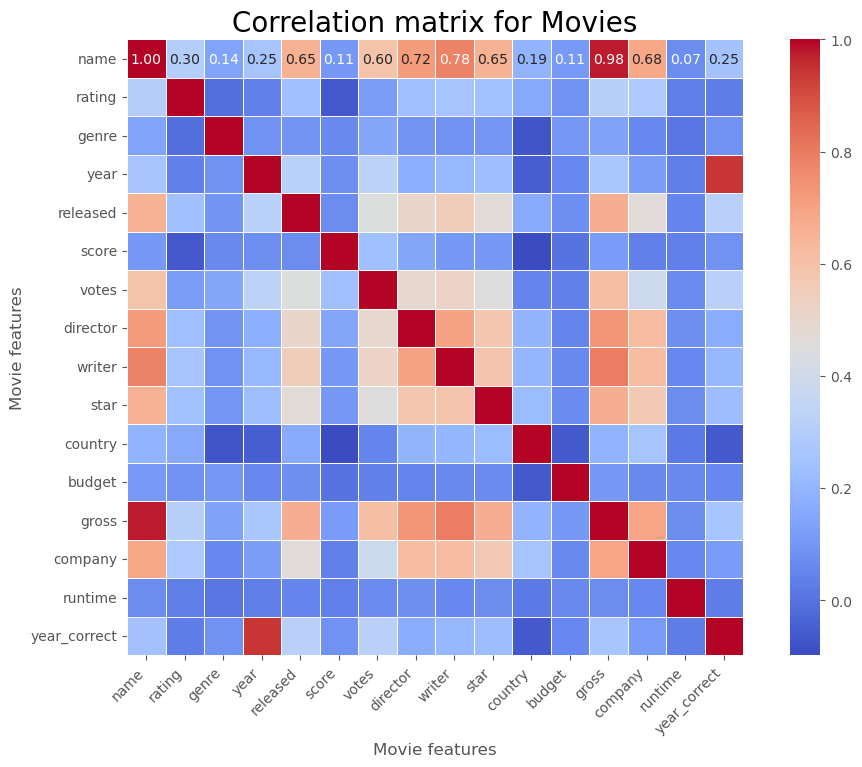

In [278]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title("Correlation matrix for Movies", size=20)
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [280]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name          name            1.000000
              rating          0.303939
              genre           0.138367
              year            0.253906
              released        0.654708
              score           0.107033
              votes           0.595709
              director        0.720119
              writer          0.782765
              star            0.652683
              country         0.190638
              budget          0.111217
              gross           0.978147
              company         0.682797
              runtime         0.071772
              year_correct    0.246706
rating        name            0.303939
              rating          1.000000
              genre          -0.012156
              year            0.037943
              released        0.237091
              score          -0.065634
              votes           0.118612
              director        0.235155
              writer          0.256080
              star       

In [282]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score         country        -0.098455
country       score          -0.098455
genre         country        -0.073897
country       genre          -0.073897
score         rating         -0.065634
rating        score          -0.065634
country       year_correct   -0.061957
year_correct  country        -0.061957
country       budget         -0.061499
budget        country        -0.061499
country       year           -0.053654
year          country        -0.053654
rating        genre          -0.012156
genre         rating         -0.012156
score         budget          0.001150
budget        score           0.001150
runtime       genre           0.005585
genre         runtime         0.005585
runtime       country         0.017505
country       runtime         0.017505
year_correct  rating          0.026917
rating        year_correct    0.026917
year_correct  runtime         0.029336
runtime       year_correct    0.029336
year          runtime         0.032916
runtime       year       

In [284]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released      director        0.502899
director      released        0.502899
writer        votes           0.521115
votes         writer          0.521115
writer        released        0.547861
released      writer          0.547861
star          company         0.569721
company       star            0.569721
star          director        0.580146
director      star            0.580146
writer        star            0.589832
star          writer          0.589832
votes         name            0.595709
name          votes           0.595709
votes         gross           0.611780
gross         votes           0.611780
company       director        0.614151
director      company         0.614151
writer        company         0.616007
company       writer          0.616007
star          name            0.652683
name          star            0.652683
released      name            0.654708
name          released        0.654708
gross         released        0.668367
released      gross      

In [ ]:
#Budget does not have a strong correlation to gross. However Director, Company, and Star have strong correlations to gross.